In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join

from PRmm.fixture import Fixture
from PRmm.extras.hqrfHmm import *
from PRmm.extras.activityPlots import *

import tqdm
from intervaltree import Interval

%matplotlib inline

In [ ]:
df = loadBazViewerHDF5("/Users/dalexander/Data/m54012_160228_211932.metrics.h5")
hn0 = 10944718
dfZ = df[df.ZmwNumber == hn0]
D = DromedaryHQRegionFinder()
E = EnhancedHQRegionFinder()


dfi = df.set_index("ZmwNumber")

fx = Fixture.fromIniFile("/home/UNIXHOME/dalexander/Projects/Bugs/HQRF-echidna/RevertTransition/bcstream/fixtures.ini", "4")


In [ ]:
# Tabulate a list of ZMWs where we have good alignments but end up with no HQR 
# with E (whereas we had one in D)

def hqrIsEmpty(hqr):
    s, e = hqr
    return (e==s)

hnsOfInterest = [ hn for hn in fx.holeNumbersWithAlignments[:1000]
                  if (hqrIsEmpty(E.findHQRegion(df, hn)) and
                      not hqrIsEmpty(fx[hn].baseRegions.hqRegion.extent) and
                      sum(len(aln) for aln in fx[hn].alignments) > 500) ]                
    

In [ ]:
from PRmm.extras.activityPlots import hdf5MetricsPlot
from ipywidgets import *

def plotMetricsP(hn):
    z = fx[hn]
    hdf5MetricsPlot(df, hn, fx)
    print z.hqRegionSnr
    print z.baseRegions.hqRegion, E.findHQRegion(df, hn)

#hnsWithAln = fx.holeNumbersWithAlignments[:100]

hnW = Select(description="Hole number:",
               options={ str(hn) : hn
                         for hn in hnsOfInterest })

interact(plotMetricsP, hn=hnW)


In [ ]:
def testDriveHqrf(fx, df, hqrf):
    numMappableHQSubreads = 0
    #numMappableHQBases = 0
    #numUnmappableHQSubreads = 0
    #numUnmappableHQBases = 0    
    
    # only looking in holes w/ alns for the moment...
    #for hn in tqdm.tqdm(fx.holeNumbers):
    for hn in tqdm.tqdm(fx.holeNumbersWithAlignments):
        fxZ = fx[hn]
        alnIntervals = [ Interval(*aln.extent) for aln in fxZ.baseRegions.alignments ]
        dfZ = df.loc[hn]
        hqInterval = Interval(*hqrf.findHQRegion(dfZ))        
        
        # Tabulate--mappable
        for ai in alnIntervals:
            if ai.overlaps(hqInterval):
                numMappableHQSubreads += 1
                
    return numMappableHQSubreads
                
print testDriveHqrf(fx, dfi, D)
print testDriveHqrf(fx, dfi, E)

The above work was suggestive that the "enhanced" HQRF was viable again.  Indeed, it seems to be the case.  However we face a ~15% loss of mappable subreads.  Let's follow up and inspect those ZMWs for clues.

### Next: follow up on lost yield


In [2]:
fx_dha = Fixture.fromIniFile(
    "/home/UNIXHOME/dalexander/Projects/Bugs/HQRF-echidna/RevertTransition/dha-vs-main.ini",
     "dha")
fx_mainline = Fixture.fromIniFile(
    "/home/UNIXHOME/dalexander/Projects/Bugs/HQRF-echidna/RevertTransition/dha-vs-main.ini",
     "mainline")
metricsDf = loadBazViewerHDF5("/home/UNIXHOME/dalexander/Projects/Bugs/HQRF-echidna/RevertTransition/dastream/Old/m54012_160228_211932.metrics.h5")

In [ ]:
for hn in fx_mainline.holeNumbers[:500]:
    alnCount_mainline = len(fx_mainline[hn].alignments)
    alnCount_dha      = len(fx_dha[hn].alignments)
    
    if alnCount_dha < alnCount_mainline:
        print hn, alnCount_mainline, alnCount_dha


In [ ]:
hdf5MetricsPlot(metricsDf, 11075779, fx_dha)

In [ ]:
title

In [ ]:
fxZ.alignments[0].isForwardStrand

In [ ]:
hn

In [4]:
fxZ = fx_dha[11075779]
dfZ = metricsDf[metricsDf.ZmwNumber==11075779]

([0] + list(np.cumsum(dfZ.NUM_FRAMES)))[200]/80.0

10214.4

In [ ]:
fxZ.pulseStartFrame

In [16]:
from PRmm.extras.activityPlots import isNearSandwich


sw = isNearSandwich(fxZ.prePulseFrames, fxZ.pulseLabel)

sf = fxZ.pulseStartFrame

print sf[sw]

print sf[sw]/fxZ.frameRate

[ 24588  50730  51461  54627 174508 376015 376665 396846 409800 411974
 496276 496286 523522 555807 643689 671448 671463 754124 759218 774379
 793530 805373 805819 817871 830792 862800 866042 959796]
[   307.3807505     634.18844449    643.3268587     682.9058182
   2181.56824504   4700.65775585   4708.78356876   4961.07130774
   5123.0125084    5150.19022727   6204.07065793   6204.19567044
   6544.67973261   6948.28260922   8046.91751714   8393.93973339
   8394.12725215   9427.49313052   9491.17450123   9680.70596204
   9920.11741287  10068.16972409  10073.74528187  10224.41035447
  10385.93901387  10786.07904405  10826.60809859  11998.65035021]


In [8]:
sum(sw)

28

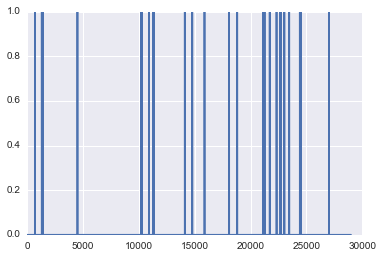

In [10]:
plt.plot(sw)

In [15]:
fxZ.frameRate

79.991997